# Table of Contents


Project: Analysis of Gun Violence in USA

Author: Sanjog Niroula
Date: Dec 27, 2022

Data source: https://www.kaggle.com/jameslko/gun-violence-data

Note: the dataset is 150MB and after zipping it becomes 35MB.

The dataset contains information about the violence caused by possession of guns in different cities of USA from 2013 January to 2018 March.

In [ ]:
import pandas as pd


In [2]:
data=pd.read_csv('/Users/sanjogniroula/Downloads/gun-violence-data_01-2013_03-2018.csv')

In [3]:
print(data.shape)

(239677, 29)


# Glimpse of Data

In [4]:
data.head(2)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0


In [5]:
data.columns.values

array(['incident_id', 'date', 'state', 'city_or_county', 'address',
       'n_killed', 'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship',
       'participant_status', 'participant_type', 'sources',
       'state_house_district', 'state_senate_district'], dtype=object)

In [6]:
data = data[['incident_id', 'date', 'state', 'city_or_county',
         'n_killed', 'n_injured', 'n_guns_involved', 'gun_stolen', 'gun_type',
         'participant_age_group', 'participant_gender']]

data.head(2)

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,gun_stolen,gun_type,participant_age_group,participant_gender
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male


# Data Types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   incident_id            239677 non-null  int64  
 1   date                   239677 non-null  object 
 2   state                  239677 non-null  object 
 3   city_or_county         239677 non-null  object 
 4   n_killed               239677 non-null  int64  
 5   n_injured              239677 non-null  int64  
 6   n_guns_involved        140226 non-null  float64
 7   gun_stolen             140179 non-null  object 
 8   gun_type               140226 non-null  object 
 9   participant_age_group  197558 non-null  object 
 10  participant_gender     203315 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 20.1+ MB


# Missing Data

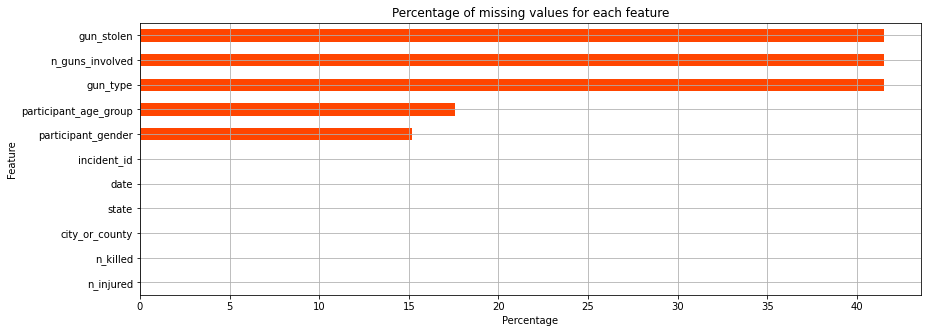

In [8]:
import matplotlib.pyplot as plt
def plot_missing_data(data):
    data.isna().mean().mul(100).iloc[::-1].sort_values().plot(
        kind='barh', figsize=(14,5), grid=True, 
        title='Percentage of missing values for each feature', color='#ff4500')
    plt.xlabel('Percentage')
    plt.ylabel('Feature')
    plt.show()
    
plot_missing_data(data)

In [9]:
# here columns have format 0::feature_name, so we convert nans to this format.
data["gun_stolen"] = data["gun_stolen"].fillna("0::Unknown")
data["gun_type"] = data["gun_type"].fillna("0::Unknown")
data["participant_age_group"] = data["participant_age_group"].fillna("0::Unknown")
data["participant_gender"] = data["participant_gender"].fillna("0::Unknown")

# if guns involved is nan, make it zero.
data["n_guns_involved"] = data["n_guns_involved"].fillna(0)


data[data['participant_gender'].str.contains("::Unknown")].head(2)

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,gun_stolen,gun_type,participant_age_group,participant_gender
38,482926,2013-03-16,California,Galt,0,7,0.0,0::Unknown,0::Unknown,0::Unknown,0::Unknown
40,482942,2013-03-17,Florida,Belle Glade,0,5,0.0,0::Unknown,0::Unknown,0::Unknown,0::Unknown


In [10]:
# checking missing data
def missing_percent(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing

missing_percent(data)

,Total,Percent
incident_id,0,0.0
date,0,0.0
state,0,0.0
city_or_county,0,0.0
n_killed,0,0.0
n_injured,0,0.0
n_guns_involved,0,0.0
gun_stolen,0,0.0
gun_type,0,0.0
participant_age_group,0,0.0


In [11]:
import numpy as np
import pandas as pd
import zipfile
import datetime
import itertools
import seaborn as sns
sns.set()


In [12]:
data['date'] = pd.to_datetime(data['date'])
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year
data["weekday"] = data["date"].dt.weekday
data["week"] = data["date"].dt.isocalendar().week
data["day_of_week"] = data[['date']].apply(lambda x: datetime.datetime.strftime(x['date'], '%a'), axis=1)
data["month_name"] = data[['date']].apply(lambda x: datetime.datetime.strftime(x['date'], '%b'), axis=1)

data.index = data['date']
data.head(2)

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,gun_stolen,gun_type,participant_age_group,participant_gender,day,month,year,weekday,week,day_of_week,month_name
date,,,,,,,,,,,,,,,,,,
2013-01-01,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,0.0,0::Unknown,0::Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,1,1,2013,1,1,Tue,Jan
2013-01-01,460726,2013-01-01,California,Hawthorne,1,3,0.0,0::Unknown,0::Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,1,1,2013,1,1,Tue,Jan


In [13]:
data["casualities"] = data["n_killed"] + data["n_injured"]
data["gender_total"] = data['participant_gender'].apply(lambda x: len(x.split('||')))

In [14]:
def return_count(row, phrase):
    return sum([_.count(phrase) for _ in row.split('||')])

row = "0::Female||1::Male||2::Male||3::Female"
phrase = "Female"
phrase = "Male"
return_count(row,phrase)

2

In [15]:
data["male"] = data['participant_gender'].apply(return_count, args=("Male",))
data["female"] = data['participant_gender'].apply(return_count, args=("Female",))
data["gender_unknown"] = data['participant_gender'].apply(return_count, args=("Unknown",))

In [16]:
data["stolen"] = data["gun_stolen"].apply(return_count, args=("Stolen",))
data["notstolen"] = data["gun_stolen"].apply(return_count, args=("Not-stolen",))

In [17]:
data["child"] = data["participant_age_group"].apply(return_count, args=("Child 0-11",))
data["teen"] = data["participant_age_group"].apply(return_count, args=("Teen 12-17",))
data["adult"] = data["participant_age_group"].apply(return_count, args=("Adult 18+",))

<AxesSubplot:ylabel='state'>

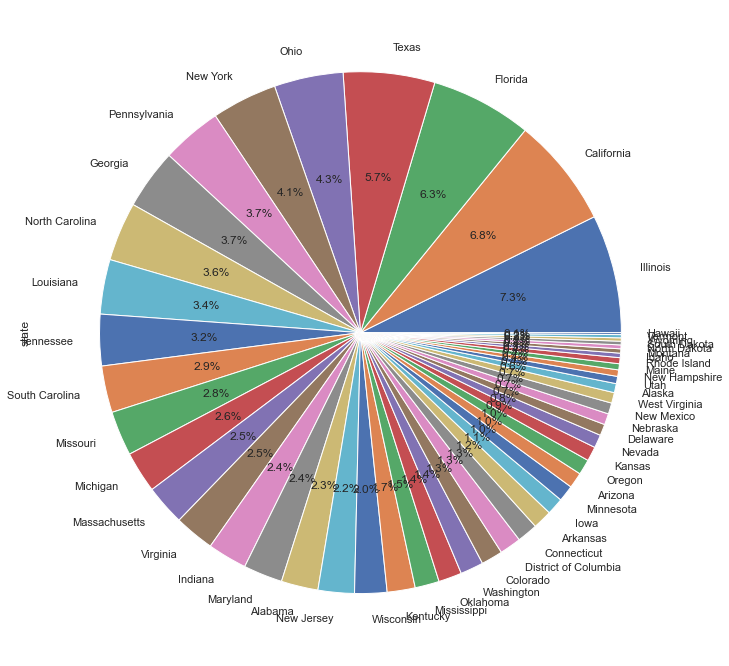

In [18]:
data["state"].value_counts().plot.pie(autopct="%1.1f%%",figsize=(12,12))

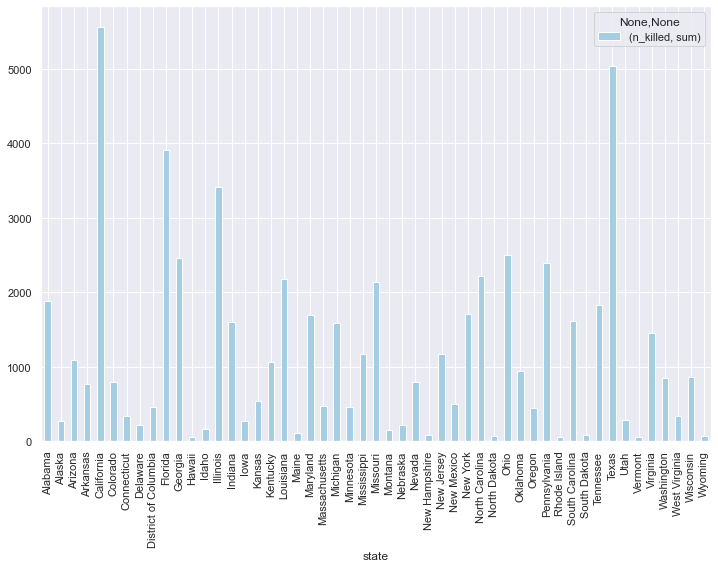

In [19]:
(data.groupby('state')
 .agg({'n_killed':['sum']})
 .plot
 .bar(figsize=(12,8), colormap='Paired'));

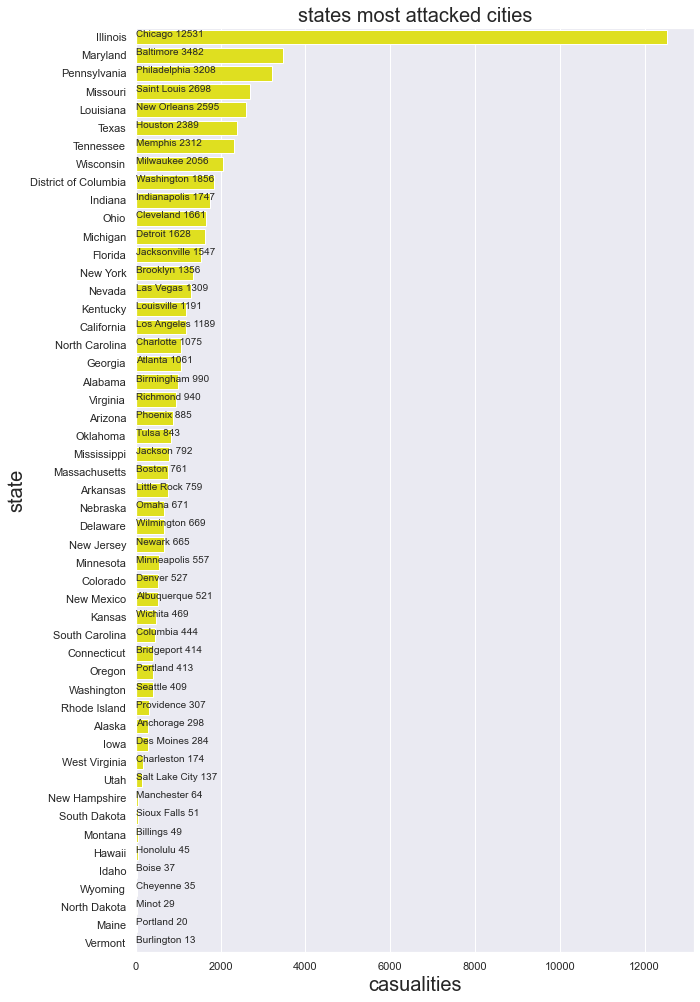

In [20]:
def plot_barh2(data,x1,x2,y):
    """
    e.g.
    x1, x2 = state, city
    y = income
    """
    df1 = (data.groupby([x1,x2])[y]
           .sum()
           .reset_index()
           .sort_values(by=y,ascending=False)
           .drop_duplicates(subset=[x1],keep="first"))

    fig = plt.figure(figsize=(10,17))
    ax = sns.barplot(y = x1,x = y, data = df1,
                     palette=['yellow'])

    for i,j in enumerate(df1.values):
        ax.text(.7,i,j[1]+ ' ' + str(j[2]) ,fontsize =10)

    plt.title("states most attacked cities",fontsize = 20)
    plt.xlabel(y,fontsize = 20)
    plt.ylabel(x1,fontsize = 20)
    fig.set_facecolor("w");

plot_barh2(data,"state","city_or_county","casualities")

In [21]:
%%bash
date
python --version
for i in numpy pandas seaborn
  do
    pip freeze | grep $i
  done

Tue Dec 27 17:43:35 CST 2022
Python 3.9.7
numpy==1.22.3
numpydoc @ file:///tmp/build/80754af9/numpydoc_1605117425582/work
pandas==1.3.4
seaborn @ file:///tmp/build/80754af9/seaborn_1629307859561/work


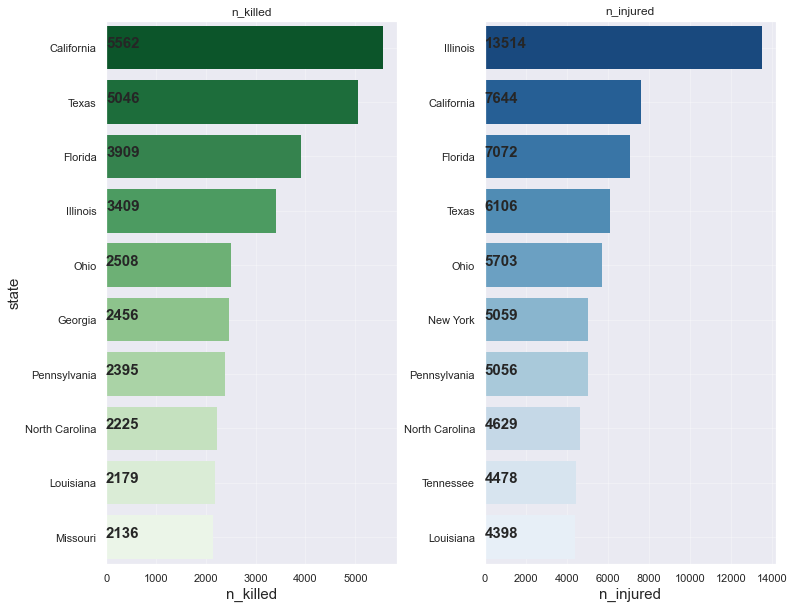

In [22]:
def two_barplots(df,x1,x2,y):
    df1 = data.groupby(y)[x1].sum().reset_index().sort_values(by=x1,ascending=False)
    df2 = data.groupby(y)[x2].sum().reset_index().sort_values(by=x2,ascending=False)
    NUM = 10

    fig = plt.figure(figsize=(12,10))

    # first plot
    plt.subplot(121)
    ax = sns.barplot(x=x1, y = y,data=df1[:NUM],
                     palette="Greens_r",linewidth=1,edgecolor = ['none']*NUM)
    plt.ylabel(y,fontsize=15)
    plt.xlabel(x1,fontsize=15)
    plt.title(x1)
    for i,j in enumerate(df1[x1][:NUM]):
        ax.text(.9,i,j,weight="bold",fontsize=15)
    plt.grid(True,alpha= .3)


    # second plot
    plt.subplot(122)
    ax = sns.barplot(x=x2,y=y,data=df2[:NUM],
                     palette="Blues_r",linewidth=1,edgecolor = ['none']*NUM)
    plt.ylabel("")
    plt.xlabel(x2,fontsize=15)
    plt.subplots_adjust(wspace=.3)
    plt.title(x2)
    for i,j in enumerate(df2[x2][:NUM]):
        ax.text(.9,i,j,weight="bold",fontsize=15)
    plt.grid(True,alpha= .3)

    fig.set_facecolor("w");
    
two_barplots(data,"n_killed","n_injured", "state")

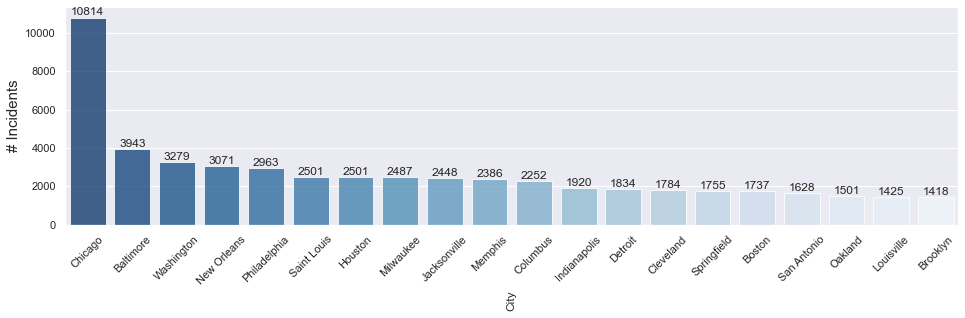

In [23]:
def barplot(data):
    """
    Example: 
    df1 = df['c0'].value_counts().nlargest(10)
    """
    plt.figure(figsize=(16,4))
    ax = sns.barplot(x=df1.index, y=df1.values, alpha=0.8,palette='Blues_r')
    plt.ylabel('# Incidents', fontsize=15)
    plt.xlabel('City', fontsize=12,rotation=90)

    # total counts
    rects = ax.patches
    labels = df1.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 5, label, ha='center', va='bottom')
        
    loc, labels = plt.xticks()
    ax.set_xticklabels(labels, rotation=45)
    plt.show()
    
df1 = data['city_or_county'].value_counts().nlargest(20)   
barplot(df1)

In [24]:
df1 = data[['year','n_killed','n_injured','casualities']].groupby('year').sum()
df1.head()

,n_killed,n_injured,casualities
year,,,
2013,317,979,1296
2014,12557,23002,35559
2015,13484,26967,40451
2016,15066,30580,45646
2017,15511,30703,46214


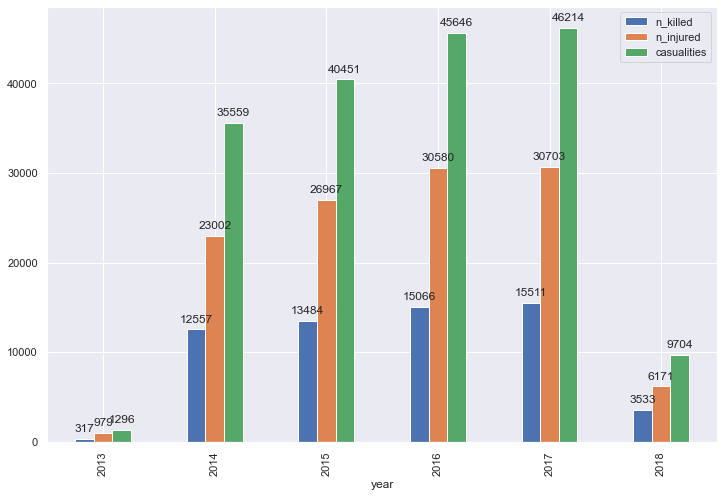

In [25]:
def plot_bar_total_pd(df1):
    ax = df1.plot(kind='bar',figsize=(12,8))
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), 
                    (p.get_x()+p.get_width()/2.,p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
plot_bar_total_pd(df1)

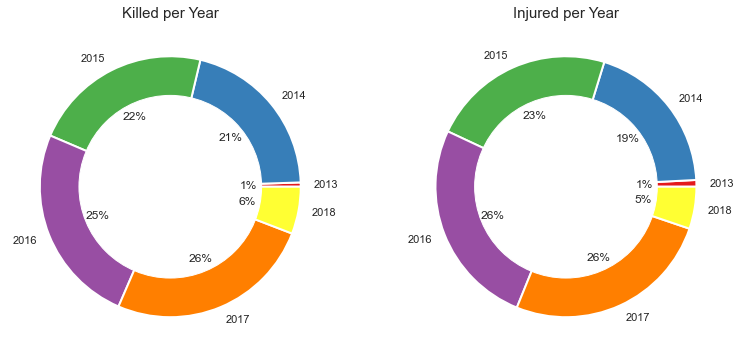

In [26]:
def stacked_pieplots(data,x,y1,y2):
    df1 = data.groupby(x)[[y1,y2]].sum()
    fig = plt.figure(figsize=(13,6))

    # plot 1
    plt.subplot(121)
    plt.pie(df1[y1],
            labels=df1.index,
            autopct="%1.0f%%",shadow=False,
            colors=sns.color_palette("Set1",7),
            wedgeprops={"linewidth":2,"edgecolor":"white"})
    my_circ = plt.Circle((0,0),.7,color="w")
    plt.gca().add_artist(my_circ)
    plt.title("Killed per Year",fontsize=15)

    # plot 2
    plt.subplot(122)
    plt.pie(df1[y2],
            labels=df1.index,
            autopct="%1.0f%%",shadow=False,
            colors=sns.color_palette("Set1",7),
            wedgeprops={"linewidth":2,"edgecolor":"white"})
    my_circ = plt.Circle((0,0),.7,color="w")
    plt.gca().add_artist(my_circ)
    plt.title("Injured per Year",fontsize=15)
    fig.set_facecolor("w");
    
stacked_pieplots(data,'year','n_killed', 'n_injured')

In [27]:
def yearly_barplots(data,x1,x2,y):
    """
    Example:
    x1 = year
    x2 = state
    y = casualities
    """
    df1 = (data.groupby([x1,x2])[[y]]
           .sum()
           .reset_index()
           .sort_values(by=[x1,y],ascending=False))

    years  = data[x1].unique().tolist()
    length = len(years)

    fig = plt.figure(figsize=(12,18))
    NUM = 10

    for i,j in itertools.zip_longest(years,range(length)):
        plt.subplot(3,2,j+1)
        ax = sns.barplot(y,x2,
                         data=df1[df1[x1] == i][:NUM],
                         palette="Blues_r",
                         linewidth = 1 ,
                         edgecolor = "k"*NUM)
        plt.title(i,fontsize=20,color="b")
        plt.ylabel("")
        plt.subplots_adjust(wspace=.35,hspace=.4)
        plt.yticks(fontsize=12)
        for i,j in enumerate(df1[df1[x1] == i][y][:NUM]):
            plt.text(.7,i,j,weight="bold")
        fig.set_facecolor("y")
        
yearly_barplots(df,"year","state","casualities")

NameError: name 'df' is not defined

/Users/sanjogniroula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sanjogniroula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sanjogniroula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

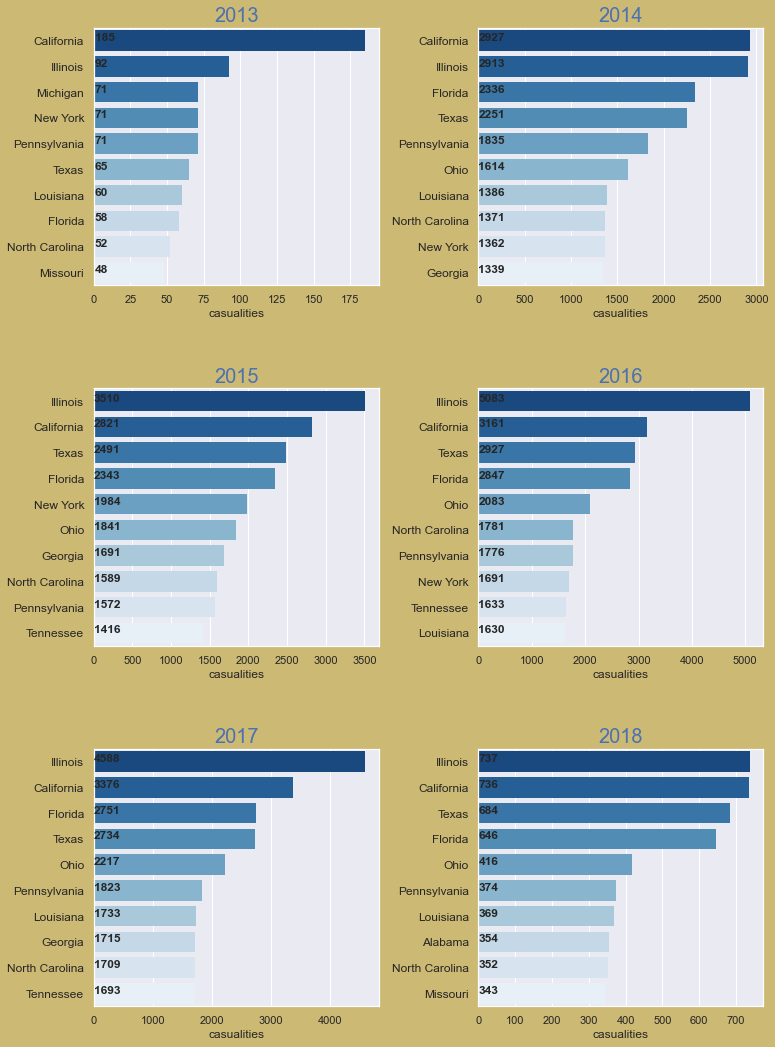

In [29]:
def yearly_barplots(data,x1,x2,y):
    """
    Example:
    x1 = year
    x2 = state
    y = casualities
    """
    df1 = (data.groupby([x1,x2])[[y]]
           .sum()
           .reset_index()
           .sort_values(by=[x1,y],ascending=False))

    years  = data[x1].unique().tolist()
    length = len(years)

    fig = plt.figure(figsize=(12,18))
    NUM = 10

    for i,j in itertools.zip_longest(years,range(length)):
        plt.subplot(3,2,j+1)
        ax = sns.barplot(y,x2,
                         data=df1[df1[x1] == i][:NUM],
                         palette="Blues_r",
                         linewidth = 1 ,
                         edgecolor = ['none']*NUM)
        plt.title(i,fontsize=20,color="b")
        plt.ylabel("")
        plt.subplots_adjust(wspace=.35,hspace=.4)
        plt.yticks(fontsize=12)
        for i,j in enumerate(df1[df1[x1] == i][y][:NUM]):
            plt.text(.7,i,j,weight="bold")
        fig.set_facecolor("y")
        
yearly_barplots(data,"year","state","casualities")

In [32]:
from wordcloud import WordCloud
from PIL import  Image

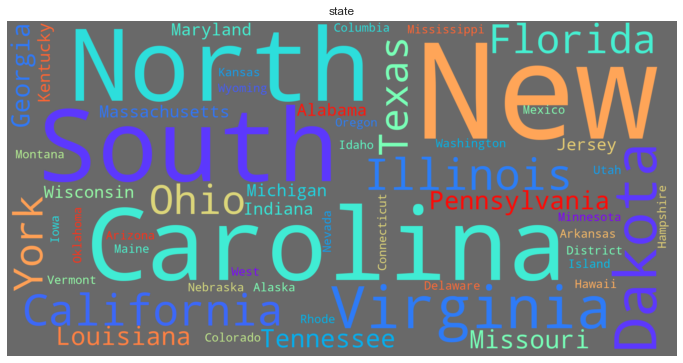

In [33]:
def wordcloud(data,x):
    words = data[x].value_counts().keys()
    wc = WordCloud(max_words=60,scale=5,colormap="rainbow",
                   background_color="dimgrey").generate(" ".join(words))
    plt.figure(figsize=(12,8))
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.title(x)
    
wordcloud(data,'state')

In [34]:
df1 = data[["month", "n_killed","n_injured",'casualities']].groupby("month").sum()
df1.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1.head()       
#  .plot(kind='barh',stacked=True));


# ax.set_yticklabels(mymonths); # note that here x axis was already sorted

,n_killed,n_injured,casualities
Jan,6035,10946,16981
Feb,4945,8420,13365
Mar,5641,10475,16116
Apr,4383,8907,13290
May,4830,10244,15074


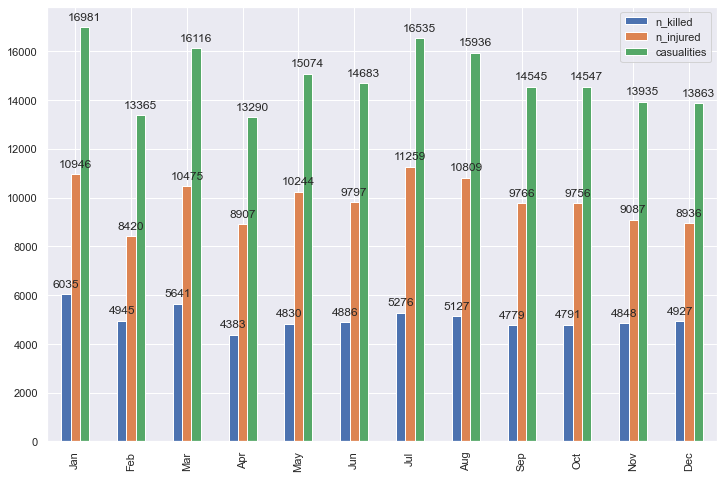

In [35]:
plot_bar_total_pd(df1)

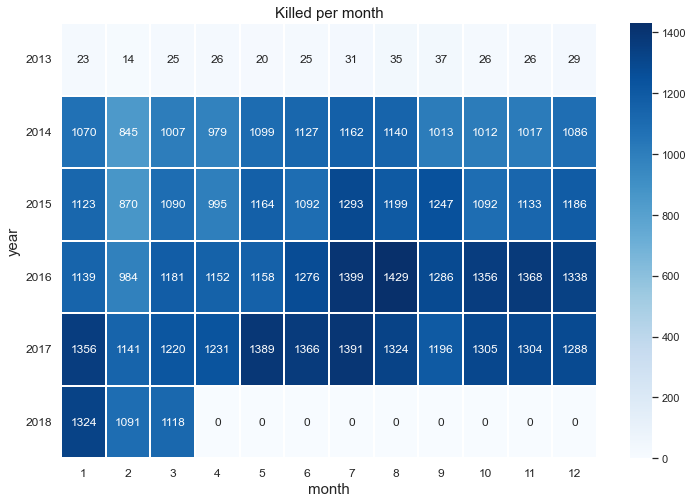

In [37]:
def heatmap_3cols(data,idx,col,val):
    df1 = (pd.pivot_table(index=idx,
                         columns=col,
                         values=val,
                         data=data,
                         aggfunc="sum")
                         .fillna(0))

    for i in df1.columns:
        df1[i] = df1[i].astype(np.int64)

    plt.figure(figsize=(12,8))
    fig = sns.heatmap(df1.transpose(),
                      cmap="Blues",
                      annot=True,
                      fmt="d",
                      linecolor="white",
                      linewidths=2)

    plt.xticks(fontsize =12)
    plt.yticks(fontsize =12,rotation=0)
    plt.ylabel(col,fontsize=15)
    plt.xlabel(idx,fontsize=15)
    plt.title('Killed per month',fontsize=15,color="k")
    plt.show()

heatmap_3cols(data,'month','year','n_killed')

In [39]:
def stacked_barplot2(data, x, y1, y2):
    """
    WARNING:
    The total only works when column x is sring dtype.
    It does not work for numbers, e.g. year column
        even if I converted column dtype as str.
    
    """
    NUM = 30
    df1 = data[[x, y1, y2]].copy()
    df1['y_sum'] = df1[y1] + df1[y2]
    df1 = (df1.groupby(x)
           .sum()
           .reset_index()
           .sort_values(by="y_sum", ascending=False)[[x, y1, y2]]
           .head(NUM))
    
    plt.figure(figsize=(10, 6))
    
    # plot 1
    ax1 = sns.barplot(x,y2,data=df1,
                      color="b",
                      label=y1,
                      linewidth=.5,
                      palette='Greens_r',
                      edgecolor=['none'] * df1[x].nunique())

    # total text on top of plot
    for p,d in zip(ax1.patches,df1.values):
        y_sum = '{:,.0f}'.format(d[1]+d[2])
        ax1.annotate(y_sum,(p.get_x()+p.get_width()/2.,p.get_height()),
                     ha='center', 
                     va='center',
                     xytext=(0, 10),
                     rotation=90,
                     textcoords='offset points')
     # plot 2
    ax2 = sns.barplot(x, y1, data=df1,
                      color="r", 
                      label=y2,
                      linewidth=.5,
                      palette = 'Blues_r',
                      edgecolor=['none'] * df1[x].nunique())
    
    plt.legend(loc="best", prop={"size": 15})
    plt.xticks(rotation=70)
    plt.title(y1 + " and " + y2)
    plt.grid(True, alpha=.4)
    plt.show()
    
    df1['y_sum'] = df1[y1] + df1[y2]
    return df1.head()

/Users/sanjogniroula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sanjogniroula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


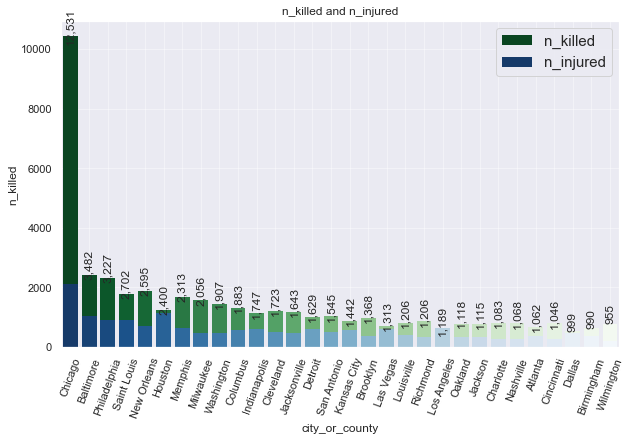

,city_or_county,n_killed,n_injured,y_sum
2019,Chicago,2104,10427,12531
530,Baltimore,1055,2427,3482
9018,Philadelphia,901,2326,3227
10152,Saint Louis,919,1783,2702
8060,New Orleans,703,1892,2595


In [40]:
stacked_barplot2(data, "city_or_county", "n_killed", "n_injured")

<AxesSubplot:>

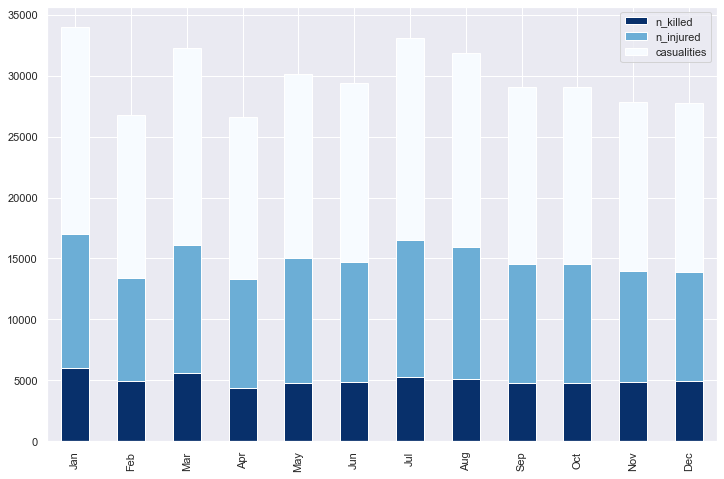

In [41]:
df1.plot(kind='bar',stacked=True,figsize=(12,8),colormap='Blues_r')

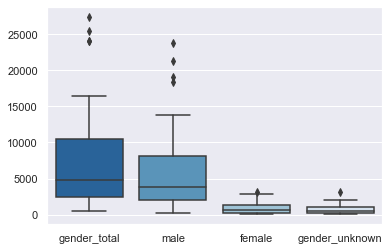

In [43]:
df1= data[["state", "gender_total", "male", "female",
         "gender_unknown"]].groupby(data["state"]).sum()

sns.boxplot(data=df1, palette='Blues_r');

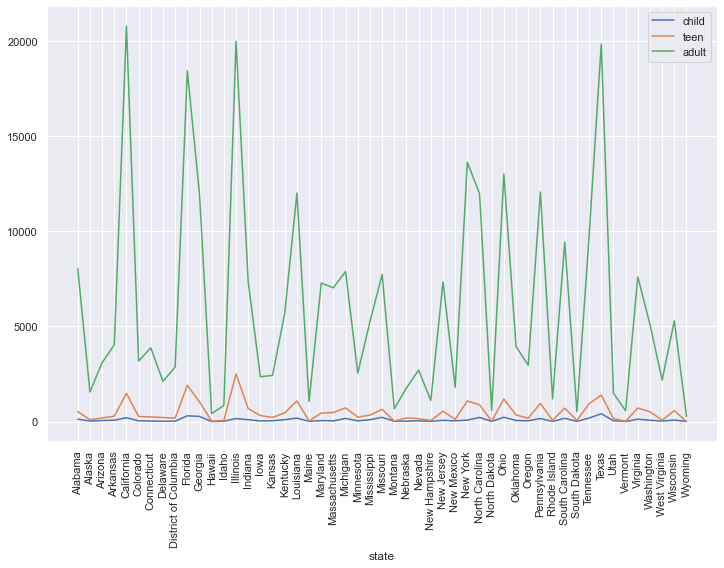

In [44]:
df1 = data[["state","child","teen", "adult"]].groupby(data["state"]).sum()
df1.plot(kind='line',xticks=range(51),rot=90,figsize=(12,8));

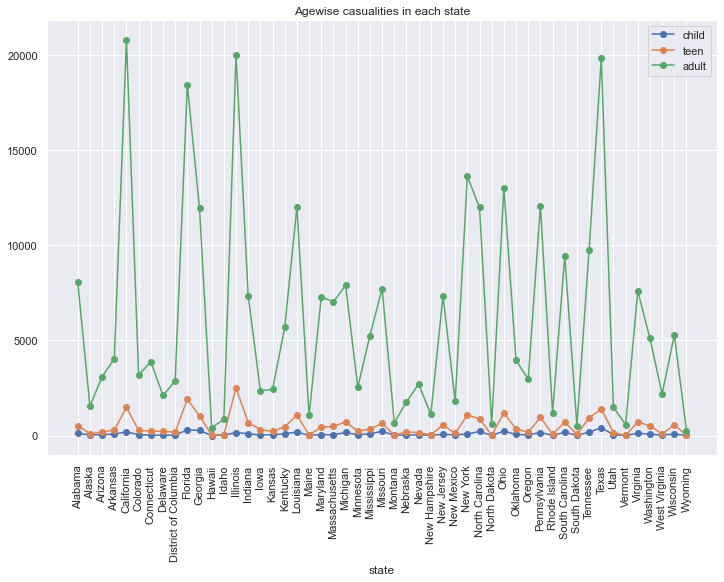

In [46]:
def plot_line_pd(df1):
    df1.plot(kind='line',
             xticks=range(51),
             rot=90,
             marker='o',
             title='Agewise casualities in each state',
             figsize=(12,8));
    
df1 = data[["state","child","teen", "adult"]].groupby(data["state"]).sum()
plot_line_pd(df1)

In [47]:
df1 = (data['n_guns_involved']
       .dropna()
       .apply(lambda x : "2+" if x>2 else str(int(x)))
       .value_counts())

df1.head()

1     127548
0      99451
2       7477
2+      5201
Name: n_guns_involved, dtype: int64

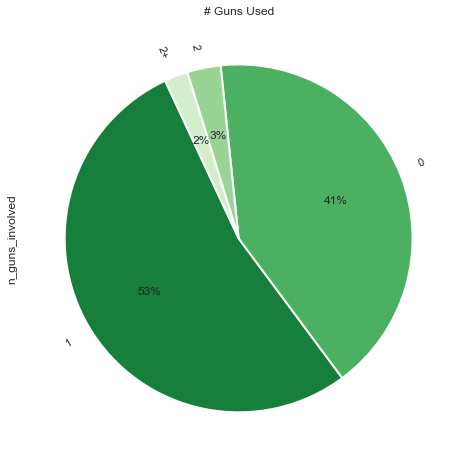

In [48]:
def plot_pie_pd(df1):
    df1.plot(kind='pie',
                 y='values',
                 title='# Guns Used',
                 figsize=(8,8),
                 autopct="%1.0f%%",
                 shadow=False,
                 startangle=115,
                 rotatelabels=True,
                 colors=sns.color_palette("Greens_r",len(df1)),
                 wedgeprops={"linewidth":2,"edgecolor":"white"});
plot_pie_pd(df1)